In [2]:
import numpy as np
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Распределение, у которого конечны первые четыре момента, а пятое - нет:

$p_{\xi}(x)=\frac{c}{x^6}I(1\leq x)$. Действительно,

$\mathbb{E}\xi^4 = \int_1^{+\infty}\frac{cx^4}{x^n}dx$ сходится, если $n \geq 6$ (равен $c$).

$\mathbb{E}\xi^5 = \int_1^{+\infty}\frac{cx^5}{x^6}dx = \int_1^{+\infty}\frac{c}{x}dx = \ln(+\infty).$ - расходится.

Таким образом, будем рассматривать распределение с плотностью


$p_{\xi}(x)=\frac{5}{x^6}I(1\leq x)$ - распределение Парето с коэффициентом масштаба $x_m=1$ и $k=5$.

### Анализ выборочной дисперсии для распределения Парето.

In [3]:
N = 10000
sample = sps.pareto.rvs(5, size=N)

Сравим теоретическую плотность с распределением выборки:

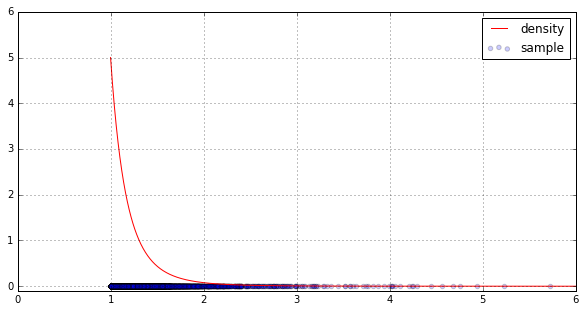

In [5]:
plt.figure(figsize=(10, 5))
grid = np.linspace(1, 6, 1000)
plt.plot(grid, sps.pareto.pdf(grid, 5), label='density', color='red')
plt.scatter(sample, np.zeros(N), alpha=0.2, label='sample')
plt.xlim(0, 6)
plt.ylim(-0.1, 6)
plt.legend()
plt.grid()
plt.show()

Посчитаем $S^2 = \overline{X^2} - (\overline{X})^2$.

Дисперсия распределения Парето:
$\mathbb{D}\xi = \int_1^{+\infty}\frac{5}{x^4}dx - (\int_1^{+\infty}\frac{5}{x^5}dx)^2 = \frac{5}{3} - (\frac{5}{4})^2 =  \frac{5}{48}$.

Сравним выборочную дисперсию и теоретическую:

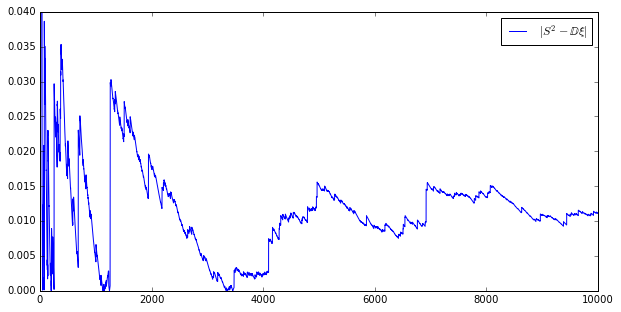

In [11]:
figure(figsize=(10,5))
sqr_means = ((sample ** 2).cumsum()) / np.arange(1, N + 1)
means = sample.cumsum() / np.arange(1, N + 1)
eva_d = sqr_means - (means ** 2)
#plot(np.arange(1, N + 1), eva_d)
plot(np.arange(1, N + 1), abs(5./48 - eva_d), label='$|S^2 - \\mathbb{D}\\xi|$')
plt.ylim(0, 0.04)
plt.legend()
plt.show()

Выборочная дисперсия весьма точно оценивает теоретическую диспресию распределения.

### Анализ выборочной дисперсии для распределения Коши.

In [12]:
sample = sps.cauchy.rvs(size=N)

Сравим теоретическую плотность с распределением выборки:

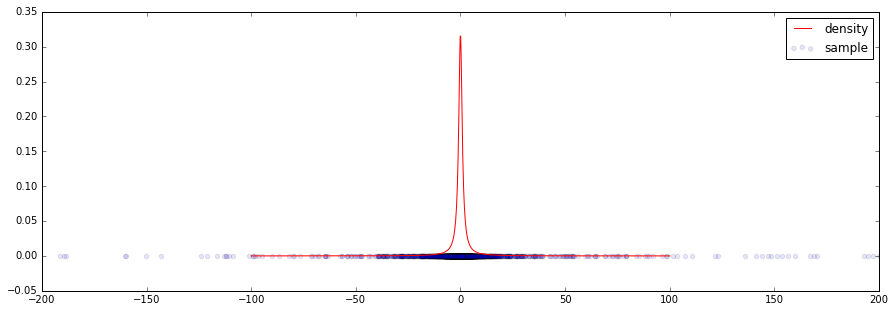

In [13]:
figure(figsize=(15, 5))
grid = np.linspace(-100, 100, 1000)
plt.plot(grid, sps.cauchy.pdf(grid), label='density', color='red')
plt.scatter(sample, np.zeros(N), alpha=0.1, label='sample')
plt.xlim(-200, 200)
plt.legend()
plt.show()

Распределение Коши не имеет дисперсию. Посмотрим на повоедение выборочной дисперсии.

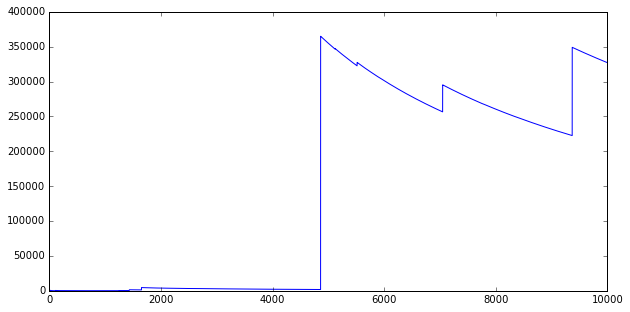

In [14]:
figure(figsize=(10,5))
sqr_means = ((sample ** 2).cumsum()) / np.arange(1, N + 1)
means = sample.cumsum() / np.arange(1, N + 1)
eva_d = sqr_means - (means ** 2)
#eva_d = means
#plot(np.arange(1, N + 1), eva_d)
plot(np.arange(1, N + 1), eva_d)

plt.show()

Выборочная дисперсия возрастает.